# Some considerations for the double null with no separator 

## Preamble
Import all the necessary stuff for this case

In [1]:
# Path relative to main directory                                                                       
import sys 
sys.path.append('../')
# Create a tmp file to pass the chosen field class to wkb class
f = open('tmp_config.py','w')
f.write('fieldclass=\'Double2dNullNoSeparator\'')
f.close()
# Import
import matplotlib.pyplot as plt 
import wkb_fast_zerobeta as wkb 
import numpy as np
import math
# Remove the f
import os
os.remove('tmp_config.py')
from magnetic_field import Double2dNullNoSeparator as magnetic_field


## The field

## Analytical prescription

$$ B_x = \frac{B_0}{a^2} (2xy)$$
$$ B_y = \frac{B_0}{a^2} (x^2 - y^2 - a^2) $$

$$ A_z = \frac{B_0}{a^2} (a^2 x + xy^2 -x^3/3) $$ 

### Fieldlines 

Let's have a look at the field, and try and get a decent contour plot based on the flux function.

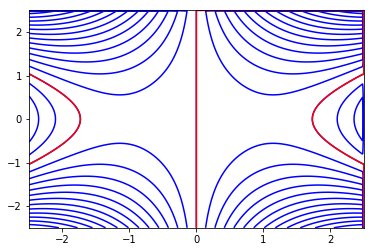

In [13]:
# Plot fieldlines as contours of the flux functon
x0 = -2.5
x1 = 2.5
y0 = x0
y1 = x1
nx = 300
ny = nx
gx = np.linspace(x0,x1,nx)
gy = np.linspace(y0,y1,ny)
 
az = np.zeros([nx,ny])
 
for iy in range(0,ny-1):
    for ix in range(0,nx-1):
        b = magnetic_field(gx[ix],gy[iy], 0.0)
        az[iy,ix] = b.az

plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(gx,gy,az,25,colors='blue')
plt.contour(gx,gy,az,levels=[0],colors='red')
plt.show()


Its a bit irritating that the contours for az = 0 don't correspond to the separatricies. Perhaps there is a guage transformation you can make

Generally if $$\mathbf{B} = \mathbf{\nabla}\times\mathbf{A}$$ then $$\mathbf{A} \rightarrow \mathbf{A} + \nabla(f)$$



Generally dont think you can get away just adding a constant to try and make the separator fieldlines correspond to $A_z = 0$. It seems like if you take $\pm 2/3$ you can get one or the other set of separatricies, plus pick up something odd on the opposite side of $x=0$.

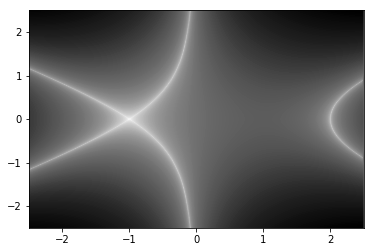

In [3]:
plt.contourf(gx,gy,np.abs(az+2./3.)**0.1,255,cmap=plt.cm.Greys)
plt.show()

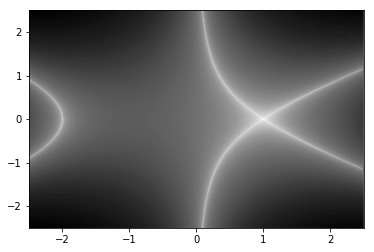

In [4]:
plt.contourf(gx,gy,np.abs(az-2./3.)**0.1,255,cmap=plt.cm.Greys)
plt.show()

(Note that the taking of the absolute value and to the power of 0.1 is just for contrast in the plots, we are just trying to identify where it goes to zero)

So it look as is we will have to add something that is curl free, but a bit more complicated. We essentially want to add $\pm 2/3$ in each half space?

Can do that with essentially linear increasing/decreasing function of $x$ with that gradient, however, will the point-wise discontinuity at $x=0$ be an issue?


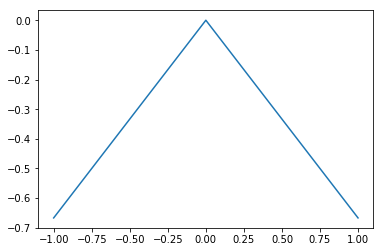

In [5]:
x= np.arange(-1., 1.1, 0.1)
plt.plot(x,-2/3*np.abs(x))
plt.show()

Could just do this numerically (i.e. just add $\pm2/3$ in each quadrant to the real $A_z$), but this has the issue that the line $z=0$ is also picked up (it isn't a separator).

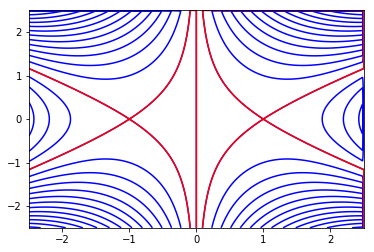

In [14]:
for iy in range(0,ny-1):
    for ix in range(0,nx-1):
        b = magnetic_field(gx[ix],gy[iy], 0.0)
        az[iy,ix] = b.az - 2./3. * np.sign(gx[ix])

plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(gx,gy,az,25,colors='blue')
plt.contour(gx,gy,az,levels=[0],colors='red')
plt.show()

## Field magnitude 


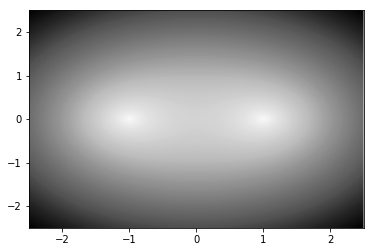

In [20]:
bx = np.zeros([nx,ny])
by = np.zeros([nx,ny])
babs = np.zeros([nx,ny])
 
for iy in range(0,ny-1):
    for ix in range(0,nx-1):
        b = magnetic_field(gx[ix],gy[iy], 0.0)
        bx[iy,ix] = b.x
        by[iy,ix] = b.y
        babs[iy,ix] = b.abs

plt.contourf(gx,gy,babs**0.5,levels=255,cmap=plt.cm.Greys)
plt.show()